In [ ]:
!pip install emoji

     |████████████████████████████████| 51kB 3.0MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49717 sha256=1b8c68c3d57b108fbb17d476b915cb222a6c5176795c6a45496250b620fde6fc
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [ ]:
import emoji

 <font size=5.5> 👚 👕 **Prendas de Indumentaria** 👗 👜 </font>

Utilizando redes neuronales, se quiere crear un modelo que prediga 10 clases, las cuales son imágenes de prendas de indumentaria.
<br/>
El dataset a utilizar será **Fashion-MNIST** que está ya incluído en la librería *Keras*.

In [ ]:
#Importamos las librerías necesarias
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
#Cargamos los datos ya divididos entre train y test set
(x_train, y_train), (x_test, y_test)=keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


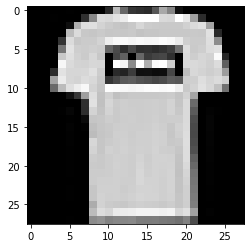

In [ ]:
#Observamos algunos de los elementos del dataset
import matplotlib.pyplot as plt

plt.imshow(x_train[1], cmap='gray', interpolation='none')

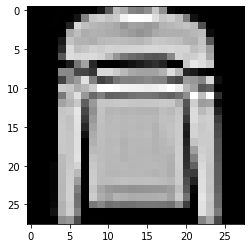

In [ ]:
plt.imshow(x_train[5], cmap='gray', interpolation='none')

In [ ]:
#observamos las dimensiones del dataset
x_train.shape

(60000, 28, 28)

In [ ]:
#dimensión de cada elemento del dataset
x_train[0].shape

(28, 28)

 <font size=5>  **Creación del modelo 1** </font>

In [ ]:
#Importamos las librerías
from keras import Sequential
from keras.layers import Dense, Flatten

#Definimos el modelo
model = keras.Sequential([
    Flatten(input_shape=(28, 28)), #Flatten para convertir matrices a vectores 
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
#Vemos cómo quedó definido el modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compilamos
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
#Entrenamos
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 19.8605 - accuracy: 0.6564 - val_loss: 0.9479 - val_accuracy: 0.7119
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.8225 - accuracy: 0.7243 - val_loss: 0.6932 - val_accuracy: 0.7794
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.6261 - accuracy: 0.7772 - val_loss: 0.6472 - val_accuracy: 0.8064
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.5683 - accuracy: 0.7998 - val_loss: 0.6195 - val_accuracy: 0.8148
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.5266 - accuracy: 0.8152 - val_loss: 0.6132 - val_accuracy: 0.7995
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.5142 - accuracy: 0.8239 - val_loss: 0.5208 - val_accuracy: 0.8259
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.4726 - accuracy: 0.8351 - val_loss: 0.5276 - val_accuracy: 0.8276
Epoch

 <font size=5>  **Evaluación del modelo 1** </font>

In [ ]:
results = model.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 0s 1ms/step - loss: 0.6503 - accuracy: 0.8040


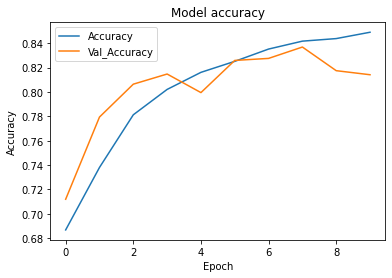

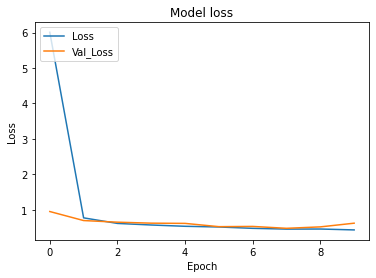

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()

Claramente el modelo se puede mejorar.
<br/>
Por el model accuracy podríamos pensar en entrenar solo hasta la 3ra época y por el model loss hasta la 2da época.

 <font size=5>  **Creación del modelo 2** </font>

In [ ]:
#Definimos el modelo 2 igual al modelo 1
model2 = keras.Sequential([
    Flatten(input_shape=(28, 28)), #Flatten para convertir matrices a vectores 
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
#Compilamos
model2.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
#Entrenamos pero solo hasta la 2da época
history = model2.fit(x_train, y_train, epochs=2, batch_size=64, validation_split=0.2)

Epoch 1/2
750/750 [==============================] - 2s 3ms/step - loss: 0.5383 - accuracy: 0.8043 - val_loss: 0.5617 - val_accuracy: 0.8122
Epoch 2/2
750/750 [==============================] - 2s 3ms/step - loss: 0.5035 - accuracy: 0.8212 - val_loss: 0.5255 - val_accuracy: 0.8217


 <font size=5>  **Evaluación del modelo 2** </font>

In [ ]:
results = model2.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 0s 1ms/step - loss: 0.5496 - accuracy: 0.8124


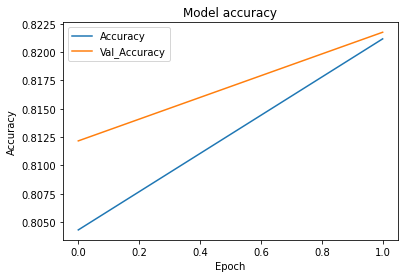

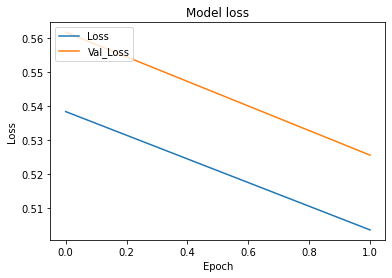

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()

El modelo 2 es mejor que el modelo 1.
<br/>
Probemos ahora un 3er modelo agregando más capas.

 <font size=5>  **Creación del modelo 3** </font>

In [ ]:
#Definimos el modelo 3
model3 = keras.Sequential([
    Flatten(input_shape=(28, 28)), #Flatten para convertir matrices a vectores 
    Dense(270, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
#Compilamos
model3.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
#Entrenamos 
history3 = model3.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 10.4066 - accuracy: 0.7092 - val_loss: 0.9295 - val_accuracy: 0.7883
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.6975 - accuracy: 0.8107 - val_loss: 0.5502 - val_accuracy: 0.8298
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4853 - accuracy: 0.8377 - val_loss: 0.5223 - val_accuracy: 0.8317
Epoch 4/10
750/750 [==============================] - 3s 5ms/step - loss: 0.4272 - accuracy: 0.8496 - val_loss: 0.4912 - val_accuracy: 0.8360
Epoch 5/10
750/750 [==============================] - 3s 5ms/step - loss: 0.4063 - accuracy: 0.8544 - val_loss: 0.4533 - val_accuracy: 0.8474
Epoch 6/10
750/750 [==============================] - 3s 5ms/step - loss: 0.4059 - accuracy: 0.8570 - val_loss: 0.4620 - val_accuracy: 0.8531
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3910 - accuracy: 0.8580 - val_loss: 0.4355 - val_accuracy: 0.8579
Epoch

 <font size=5>  **Evaluación del modelo 3** </font>

In [ ]:
results3 = model3.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.8538


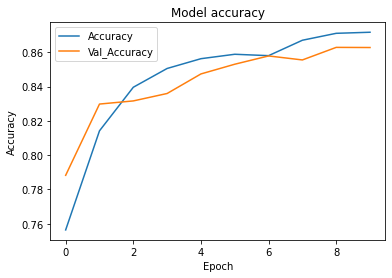

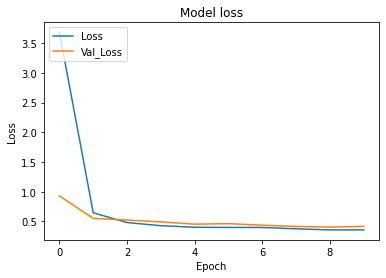

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()


plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()

Mejoró notablemente la accuracy en este modelo.
Nuevamente parece que sería una buena idea tomar hasta la 2da época.
Creemos un último modelo haciendo ese cambio.

 <font size=5>  **Creación del modelo 4** </font>


In [ ]:
#Definimos el modelo 4
model4 = keras.Sequential([
    Flatten(input_shape=(28, 28)), #Flatten para convertir matrices a vectores 
    Dense(270, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
#Compilamos
model4.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
#Entrenamos hasta la 2da época
history4 = model4.fit(x_train, y_train, epochs=2, batch_size=64, validation_split=0.2)

Epoch 1/2
750/750 [==============================] - 4s 5ms/step - loss: 0.4099 - accuracy: 0.8561 - val_loss: 0.4298 - val_accuracy: 0.8501
Epoch 2/2
750/750 [==============================] - 4s 5ms/step - loss: 0.3989 - accuracy: 0.8605 - val_loss: 0.5130 - val_accuracy: 0.8338


 <font size=5>  **Evaluación del modelo 4** </font>

In [ ]:
results4 = model4.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.8273


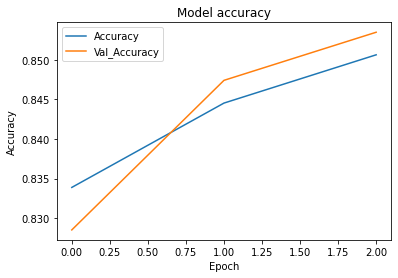

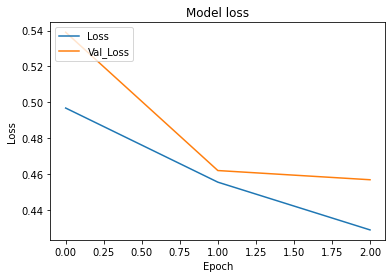

In [ ]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()


plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()

No hemos conseguido mejorar accuracy cambiando la cantidad de épocas.
<br/>
Haremos un último modelo agregando más capas.

 <font size=5>  **Creación del modelo 5** </font>

In [ ]:
#Definimos el modelo 5
model5 = keras.Sequential([
    Flatten(input_shape=(28, 28)), #Flatten para convertir matrices a vectores 
    Dense(570, activation='relu'),
    Dense(450, activation='relu'),
    Dense(320, activation='relu'),
    Dense(210, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
#Compilamos
model5.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
#Entrenamos 
history5 = model5.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 12s 16ms/step - loss: 1.5421 - accuracy: 0.7790 - val_loss: 0.5203 - val_accuracy: 0.8334
Epoch 2/10
750/750 [==============================] - 11s 15ms/step - loss: 0.4364 - accuracy: 0.8429 - val_loss: 0.4570 - val_accuracy: 0.8364
Epoch 3/10
750/750 [==============================] - 11s 15ms/step - loss: 0.4031 - accuracy: 0.8553 - val_loss: 0.4309 - val_accuracy: 0.8445
Epoch 4/10
750/750 [==============================] - 11s 15ms/step - loss: 0.3750 - accuracy: 0.8631 - val_loss: 0.4071 - val_accuracy: 0.8573
Epoch 5/10
750/750 [==============================] - 11s 15ms/step - loss: 0.3635 - accuracy: 0.8682 - val_loss: 0.3842 - val_accuracy: 0.8624
Epoch 6/10
750/750 [==============================] - 12s 16ms/step - loss: 0.3429 - accuracy: 0.8759 - val_loss: 0.3726 - val_accuracy: 0.8702
Epoch 7/10
750/750 [==============================] - 12s 16ms/step - loss: 0.3417 - accuracy: 0.8758 - val_loss: 0.3605 - val_accuracy:

 <font size=5>  **Evaluación del modelo 5** </font>

In [ ]:
results5 = model5.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 1s 6ms/step - loss: 0.3721 - accuracy: 0.8733


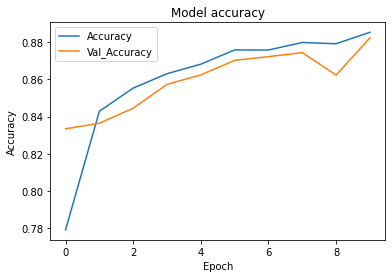

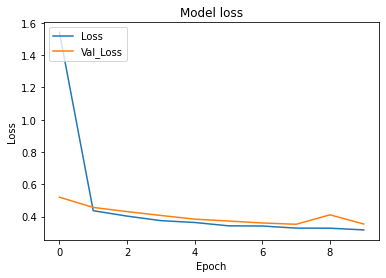

In [ ]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()


plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()

Este modelo parece mejor a los anteriores.
<br/>
Quizás podría mejorarse entrenando hasta la 1ra época.